In [1]:
#Import packages

In [1]:
from __future__ import division, print_function, unicode_literals

%matplotlib inline
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 5000)
pd.set_option('display.width', 1000)
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
# To support both python 2 and python 3
# Common imports
import os
# to make this notebook's output stable across runs
np.random.seed(42)

import matplotlib as mpl

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
mpl.rcParams['agg.path.chunksize'] = 10000

import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")
from sklearn.metrics import explained_variance_score

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Importing Train and test transactions

In [2]:
Train = pd.read_csv('train_transaction.csv')

In [3]:
Train.shape

(590540, 394)

In [4]:
#there are a lot of columns with null values
Train.isnull().sum().sort_values(ascending=False)

dist2             552913
D7                551623
D13               528588
D14               528353
D12               525823
D6                517353
D8                515614
D9                515614
V142              508595
V157              508595
V153              508595
V154              508595
V155              508595
V156              508595
V163              508595
V158              508595
V161              508595
V162              508595
V148              508595
V149              508595
V147              508595
V141              508595
V138              508595
V146              508595
V139              508595
V140              508595
V166              508589
V164              508589
V160              508589
V159              508589
V165              508589
V150              508589
V143              508589
V144              508589
V145              508589
V152              508589
V151              508589
V338              508189
V339              508189
V333              508189


In [5]:
Train.columns

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338', 'V339'], dtype='object', length=394)

In [6]:
Train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [7]:
Test = pd.read_csv('test_transaction.csv')

In [8]:
Test.shape

(506691, 393)

In [9]:
Test.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,170.0,87.0,1.0,NaN,gmail.com,NaN,6.0,6.0,0.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,5.0,1.0,115.0,6.0,419.0,419.0,27.0,398.0,27.0,NaN,NaN,NaN,NaN,418.0,203.0,NaN,NaN,NaN,409.0,T,T,F,NaN,NaN,F,T,T,T,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,47.950001,0.000000,0.000000,47.950001,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,47.950001,0.000000,0.000000,47.950001,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,299.0,87.0,4.0,NaN,aol.com,NaN,3.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,12.0,2.0,149.0,149.0,7.0,634.0,7.0,NaN,NaN,NaN,NaN,231.0,634.0,NaN,NaN,NaN,634.0,T,F,F,M0,NaN,F,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0

# Importing train and test identity files

In [10]:
Train_Identity = pd.read_csv('train_identity.csv')

In [11]:
Train_Identity.shape

(144233, 41)

In [12]:
Train_Identity.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,NaN,100.0,NotFound,49.0,-300.0,New,NotFound,166.0,NaN,621.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,iOS 11.1.2,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,52.0,NaN,Found,Found,121.0,NaN,410.0,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,NaN,New,NotFound,225.0,NaN,176.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,NaN,-300.0,Found,Found,166.0,15.0,529.0,575.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Mac OS X 10_11_6,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [13]:
Test_Identity = pd.read_csv('test_identity.csv')

In [14]:
Test_Identity.shape

(141907, 41)

In [15]:
Test_Identity.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,3663586,-45.0,280290.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,100.0,NotFound,27.0,NaN,New,NotFound,225.0,15.0,427.0,563.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
1,3663588,0.0,3579.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,Found,NaN,-300.0,Found,Found,166.0,NaN,542.0,368.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Android 6.0.1,chrome 67.0 for android,24.0,1280x720,match_status:2,T,F,T,T,mobile,LGLS676 Build/MXB48T
2,3663597,-5.0,185210.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,-360.0,New,NotFound,225.0,NaN,271.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,ie 11.0 for tablet,NaN,NaN,NaN,F,T,T,F,desktop,Trident/7.0
3,3663601,-45.0,252944.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,27.0,NaN,Found,Found,225.0,15.0,427.0,563.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
4,3663602,-95.0,328680.0,NaN,NaN,7.0,-33.0,NaN,NaN,NaN,NaN,100.0,NotFound,27.0,NaN,New,NotFound,225.0,15.0,567.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,SM-G9650 Build/R16NW


# Identifying columns to drop and merging transactions and identity files

In [16]:
train = Train.merge(Train_Identity,how = 'left', left_on='TransactionID',right_on='TransactionID')

In [17]:
train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0

In [18]:
test = Test.merge(Test_Identity,how = 'left', left_on='TransactionID',right_on='TransactionID')


### Data exploration

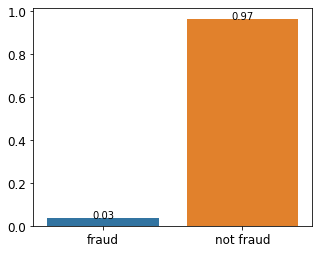

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.2f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

plt.figure(figsize=(5, 4))
ax = sns.barplot(["fraud", "not fraud"],
            [len(train[train.isFraud == 1])/len(train),
             len(train[train.isFraud == 0])/len(train)])
show_values_on_bars(ax)
plt.show()


In [20]:
# Imbalanced dataset

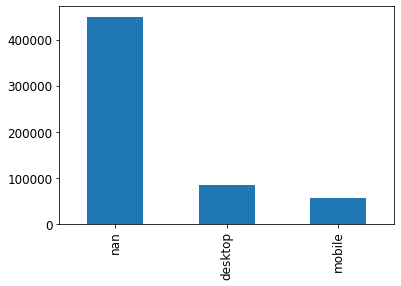

In [21]:
train["DeviceType"].value_counts(dropna=False).plot.bar()
plt.show()

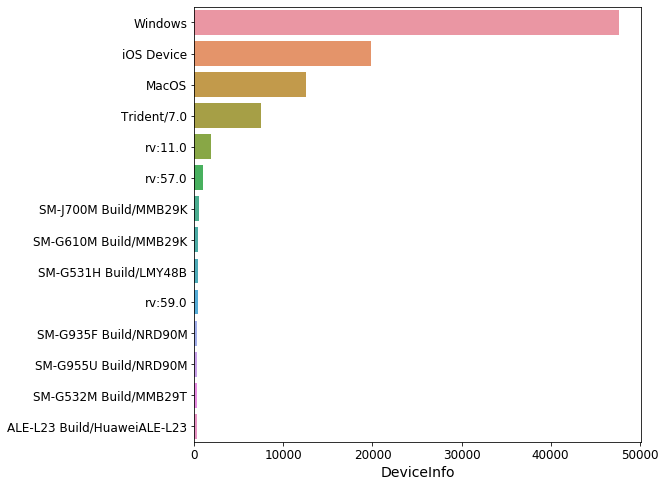

In [22]:
plt.figure(figsize=(8, 8))
sns.barplot(train["DeviceInfo"].value_counts(dropna=False)[:15], 
            train["DeviceInfo"].value_counts(dropna=False).keys()[:15])
plt.show()

EMAIL Columns

In [24]:
train.loc[train['P_emaildomain'].isin(['gmail.com', 'gmail']),'P_emaildomain'] = 'Google'

train.loc[train['P_emaildomain'].isin(['yahoo.com', 'yahoo.com.mx',  'yahoo.co.uk',
                                         'yahoo.co.jp', 'yahoo.de', 'yahoo.fr',
                                         'yahoo.es']), 'P_emaildomain'] = 'Yahoo Mail'
train.loc[train['P_emaildomain'].isin(['hotmail.com','outlook.com','msn.com', 'live.com.mx', 
                                         'hotmail.es','hotmail.co.uk', 'hotmail.de',
                                         'outlook.es', 'live.com', 'live.fr',
                                         'hotmail.fr']), 'P_emaildomain'] = 'Microsoft'
train.loc[train.P_emaildomain.isin(train.P_emaildomain\
                                         .value_counts()[train.P_emaildomain.value_counts() <= 500 ]\
                                         .index), 'P_emaildomain'] = "Others"
train.P_emaildomain.fillna("NoInf", inplace=True)

In [25]:
train.loc[train['R_emaildomain'].isin(['gmail.com', 'gmail']),'R_emaildomain'] = 'Google'

train.loc[train['R_emaildomain'].isin(['yahoo.com', 'yahoo.com.mx',  'yahoo.co.uk',
                                             'yahoo.co.jp', 'yahoo.de', 'yahoo.fr',
                                             'yahoo.es']), 'R_emaildomain'] = 'Yahoo Mail'
train.loc[train['R_emaildomain'].isin(['hotmail.com','outlook.com','msn.com', 'live.com.mx', 
                                             'hotmail.es','hotmail.co.uk', 'hotmail.de',
                                             'outlook.es', 'live.com', 'live.fr',
                                             'hotmail.fr']), 'R_emaildomain'] = 'Microsoft'
train.loc[train.R_emaildomain.isin(train.R_emaildomain\
                                         .value_counts()[train.R_emaildomain.value_counts() <= 300 ]\
                                         .index), 'R_emaildomain'] = "Others"
train.R_emaildomain.fillna("NoInf", inplace=True)

In [26]:
test.loc[train['P_emaildomain'].isin(['gmail.com', 'gmail']),'P_emaildomain'] = 'Google'

test.loc[train['P_emaildomain'].isin(['yahoo.com', 'yahoo.com.mx',  'yahoo.co.uk',
                                         'yahoo.co.jp', 'yahoo.de', 'yahoo.fr',
                                         'yahoo.es']), 'P_emaildomain'] = 'Yahoo Mail'
test.loc[train['P_emaildomain'].isin(['hotmail.com','outlook.com','msn.com', 'live.com.mx', 
                                         'hotmail.es','hotmail.co.uk', 'hotmail.de',
                                         'outlook.es', 'live.com', 'live.fr',
                                         'hotmail.fr']), 'P_emaildomain'] = 'Microsoft'
test.loc[train.P_emaildomain.isin(test.P_emaildomain\
                                         .value_counts()[test.P_emaildomain.value_counts() <= 500 ]\
                                         .index), 'P_emaildomain'] = "Others"
test.P_emaildomain.fillna("NoInf", inplace=True)

In [27]:
test.loc[train['R_emaildomain'].isin(['gmail.com', 'gmail']),'R_emaildomain'] = 'Google'

test.loc[train['R_emaildomain'].isin(['yahoo.com', 'yahoo.com.mx',  'yahoo.co.uk',
                                             'yahoo.co.jp', 'yahoo.de', 'yahoo.fr',
                                             'yahoo.es']), 'R_emaildomain'] = 'Yahoo Mail'
test.loc[train['R_emaildomain'].isin(['hotmail.com','outlook.com','msn.com', 'live.com.mx', 
                                             'hotmail.es','hotmail.co.uk', 'hotmail.de',
                                             'outlook.es', 'live.com', 'live.fr',
                                             'hotmail.fr']), 'R_emaildomain'] = 'Microsoft'
test.loc[train.R_emaildomain.isin(test.R_emaildomain\
                                         .value_counts()[test.R_emaildomain.value_counts() <= 300 ]\
                                         .index), 'R_emaildomain'] = "Others"
test.R_emaildomain.fillna("NoInf", inplace=True)

In [28]:
#selecting a subset of variables to train the model
variables  = ['TransactionDT','TransactionAmt','card1','card2', 'card3', 'card5','card6', 'addr1', 'addr2', 'dist1',
        'dist2','C1', 'C2','C3', 'C4','C5', 'C6','C7', 'C8','C9', 'C10', 'C11', 'C12','C13', 'C14',
#'D1', 'D2','D3', 'D4','D5', 'D6','D7', 'D8','D9', 'D10', 'D11', 'D12','D13', 'D14','D15',
              'M1','M2','M3','M4','M5','M6'
,'M7','M8','M9','DeviceType', 'isFraud','P_emaildomain','DeviceInfo','R_emaildomain']

train_final =  train[variables]
variables.remove('isFraud')
test_final = test[variables]

print(train_final.shape)

print(test_final.shape)

(590540, 39)
(506691, 38)


In [29]:
freq1 = train_final.DeviceType.dropna().mode()[0]
print(freq1)


freq2 = train_final.R_emaildomain.dropna().mode()[0]
print(freq2)

freq3 = train_final.DeviceInfo.dropna().mode()[0]
print(freq3)








combined = [train_final, test_final]

for data in combined:
    data['DeviceType'] = data['DeviceType'].fillna(freq1)

for data in combined:
    data['R_emaildomain'] = data['R_emaildomain'].fillna(freq2)

for data in combined:
    data['DeviceInfo'] = data['DeviceInfo'].fillna(freq3)

desktop
NoInf
Windows


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/

In [30]:
train_final.head()

,TransactionDT,TransactionAmt,card1,card2,card3,card5,card6,addr1,addr2,dist1,dist2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,M1,M2,M3,M4,M5,M6,M7,M8,M9,DeviceType,isFraud,P_emaildomain,DeviceInfo,R_emaildomain
0,86400,68.5,13926,NaN,150.0,142.0,credit,315.0,87.0,19.0,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,T,T,T,M2,F,T,NaN,NaN,NaN,desktop,0,NoInf,Windows,NoInf
1,86401,29.0,2755,404.0,150.0,102.0,credit,325.0,87.0,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN,desktop,0,Google,Windows,NoInf
2,86469,59.0,4663,490.0,150.0,166.0,debit,330.0,87.0,287.0,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,T,T,T,M0,F,F,F,F,F,desktop,0,Microsoft,Windows,NoInf
3,86499,50.0,18132,567.0,150.0,117.0,debit,476.0,87.0,NaN,NaN,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,NaN,NaN,NaN,M0,T,F,NaN,NaN,NaN,desktop,0,Yahoo Mail,Windows,NoInf
4,86506,50.0,4497,514.0,150.0,102.0,credit,420.0,87.0,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mobile,0,Google,SAMSUNG SM-G892A Build/NRD90M,NoInf


In [31]:
test_final.head()

,TransactionDT,TransactionAmt,card1,card2,card3,card5,card6,addr1,addr2,dist1,dist2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,M1,M2,M3,M4,M5,M6,M7,M8,M9,DeviceType,P_emaildomain,DeviceInfo,R_emaildomain
0,18403224,31.95,10409,111.0,150.0,226.0,debit,170.0,87.0,1.0,NaN,6.0,6.0,0.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,5.0,1.0,115.0,6.0,T,T,F,NaN,NaN,F,T,T,T,desktop,gmail.com,Windows,NoInf
1,18403263,49.00,4272,111.0,150.0,226.0,debit,299.0,87.0,4.0,NaN,3.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,12.0,2.0,T,F,F,M0,NaN,F,NaN,NaN,NaN,desktop,aol.com,Windows,NoInf
2,18403310,171.00,4476,574.0,150.0,226.0,debit,472.0,87.0,2635.0,NaN,2.0,2.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,2.0,0.0,22.0,2.0,T,T,F,M0,F,F,F,F,F,desktop,hotmail.com,Windows,NoInf
3,18403310,284.95,10989,360.0,150.0,166.0,debit,205.0,87.0,17.0,NaN,5.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,7.0,4.0,T,T,T,NaN,NaN,T,NaN,NaN,NaN,desktop,gmail.com,Windows,NoInf
4,18403317,67.95,18018,452.0,150.0,117.0,debit,264.0,87.0,6.0,NaN,6.0,6.0,0.0,0.0,2.0,5.0,0.0,0.0,5.0,0.0,6.0,0.0,14.0,6.0,T,T,T,NaN,NaN,F,F,T,T,desktop,gmail.com,Windows,NoInf


In [32]:
test_final.shape

(506691, 38)

In [33]:
train_final.shape

(590540, 39)

In [34]:
M1 = train_final.M1.dropna().mode()[0]
print(M1)
M2 = train_final.M2.dropna().mode()[0]
print(M2)
M3 = train_final.M3.dropna().mode()[0]
print(M3)
M4 = train_final.M4.dropna().mode()[0]
print(M4)
M5 = train_final.M5.dropna().mode()[0]
print(M5)
M6 = train_final.M6.dropna().mode()[0]
print(M6)
M7 = train_final.M7.dropna().mode()[0]
print(M7)
M8 = train_final.M8.dropna().mode()[0]
print(M8)
M9 = train_final.M9.dropna().mode()[0]
print(M9)

T
T
T
M0
F
F
F
F
T


In [35]:
for data in combined:
    data['M1'] = data['M1'].fillna(M1)
for data in combined:
    data['M2'] = data['M2'].fillna(M2)
for data in combined:
    data['M3'] = data['M3'].fillna(M3)
for data in combined:
    data['M4'] = data['M4'].fillna(M4)
for data in combined:
    data['M5'] = data['M5'].fillna(M5)
for data in combined:
    data['M6'] = data['M6'].fillna(M6)
for data in combined:
    data['M7'] = data['M7'].fillna(M7)
for data in combined:
    data['M8'] = data['M8'].fillna(M8)
for data in combined:
    data['M9'] = data['M9'].fillna(M9)


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

In [36]:
test_final.head()

,TransactionDT,TransactionAmt,card1,card2,card3,card5,card6,addr1,addr2,dist1,dist2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,M1,M2,M3,M4,M5,M6,M7,M8,M9,DeviceType,P_emaildomain,DeviceInfo,R_emaildomain
0,18403224,31.95,10409,111.0,150.0,226.0,debit,170.0,87.0,1.0,NaN,6.0,6.0,0.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,5.0,1.0,115.0,6.0,T,T,F,M0,F,F,T,T,T,desktop,gmail.com,Windows,NoInf
1,18403263,49.00,4272,111.0,150.0,226.0,debit,299.0,87.0,4.0,NaN,3.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,12.0,2.0,T,F,F,M0,F,F,F,F,T,desktop,aol.com,Windows,NoInf
2,18403310,171.00,4476,574.0,150.0,226.0,debit,472.0,87.0,2635.0,NaN,2.0,2.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,2.0,0.0,22.0,2.0,T,T,F,M0,F,F,F,F,F,desktop,hotmail.com,Windows,NoInf
3,18403310,284.95,10989,360.0,150.0,166.0,debit,205.0,87.0,17.0,NaN,5.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,7.0,4.0,T,T,T,M0,F,T,F,F,T,desktop,gmail.com,Windows,NoInf
4,18403317,67.95,18018,452.0,150.0,117.0,debit,264.0,87.0,6.0,NaN,6.0,6.0,0.0,0.0,2.0,5.0,0.0,0.0,5.0,0.0,6.0,0.0,14.0,6.0,T,T,T,M0,F,F,F,T,T,desktop,gmail.com,Windows,NoInf


In [37]:
train1 = train_final.dropna(thresh=len(train_final)*0.6 , axis=1)
test1 = test_final.dropna(thresh=len(test_final)*0.6, axis=1)

In [38]:
train1.shape

(590540, 37)

In [39]:
test1.shape

(506691, 36)

In [40]:
train2 = train1.select_dtypes(include='object')
train3 = train1.select_dtypes(exclude = 'object')


In [41]:
test2 = test1.select_dtypes(include='object')
test3 = test1.select_dtypes(exclude = 'object')


In [42]:
cols = train2.columns
train2[cols]=train2[cols].fillna(train2.mode().iloc[0])
train3 = train3.fillna(train3.mean())

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [43]:
cols = test2.columns
test2[cols]=test2[cols].fillna(test2.mode().iloc[0])
test3 = test3.fillna(test3.mean())

In [44]:
train2['DeviceType'].unique()

array(['desktop', 'mobile'], dtype=object)

In [45]:
test2.head()

,card6,M1,M2,M3,M4,M5,M6,M7,M8,M9,DeviceType,P_emaildomain,DeviceInfo,R_emaildomain
0,debit,T,T,F,M0,F,F,T,T,T,desktop,gmail.com,Windows,NoInf
1,debit,T,F,F,M0,F,F,F,F,T,desktop,aol.com,Windows,NoInf
2,debit,T,T,F,M0,F,F,F,F,F,desktop,hotmail.com,Windows,NoInf
3,debit,T,T,T,M0,F,T,F,F,T,desktop,gmail.com,Windows,NoInf
4,debit,T,T,T,M0,F,F,F,T,T,desktop,gmail.com,Windows,NoInf


In [46]:
from sklearn.preprocessing import LabelEncoder
train4 = train2.apply(LabelEncoder().fit_transform)
train4.head()

,card6,M1,M2,M3,M4,M5,M6,M7,M8,M9,DeviceType,P_emaildomain,DeviceInfo,R_emaildomain
0,1,1,1,1,2,0,1,0,0,1,0,2,1598,2
1,1,1,1,1,0,1,1,0,0,1,0,0,1598,2
2,2,1,1,1,0,0,0,0,0,0,0,1,1598,2
3,2,1,1,1,0,1,0,0,0,1,0,4,1598,2
4,1,1,1,1,0,0,0,0,0,1,1,0,954,2


In [47]:
from sklearn.preprocessing import LabelEncoder
test4 = test2.apply(LabelEncoder().fit_transform)
test4.head()

,card6,M1,M2,M3,M4,M5,M6,M7,M8,M9,DeviceType,P_emaildomain,DeviceInfo,R_emaildomain
0,2,1,1,0,0,0,0,1,1,1,0,18,2029,0
1,2,1,0,0,0,0,0,0,0,1,0,4,2029,0
2,2,1,1,0,0,0,0,0,0,0,0,21,2029,0
3,2,1,1,1,0,0,1,0,0,1,0,18,2029,0
4,2,1,1,1,0,0,0,0,1,1,0,18,2029,0


In [48]:
train_final = pd.concat([train4.reset_index(drop=True), train3], axis=1)
train_final.head()

,card6,M1,M2,M3,M4,M5,M6,M7,M8,M9,DeviceType,P_emaildomain,DeviceInfo,R_emaildomain,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,isFraud
0,1,1,1,1,2,0,1,0,0,1,0,2,1598,2,86400,68.5,13926,362.555488,150.0,142.0,315.0,87.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,0
1,1,1,1,1,0,1,1,0,0,1,0,0,1598,2,86401,29.0,2755,404.000000,150.0,102.0,325.0,87.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0
2,2,1,1,1,0,0,0,0,0,0,0,1,1598,2,86469,59.0,4663,490.000000,150.0,166.0,330.0,87.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0
3,2,1,1,1,0,1,0,0,0,1,0,4,1598,2,86499,50.0,18132,567.000000,150.0,117.0,476.0,87.0,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,0
4,1,1,1,1,0,0,0,0,0,1,1,0,954,2,86506,50.0,4497,514.000000,150.0,102.0,420.0,87.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0


In [49]:
train_final.shape

(590540, 37)

In [50]:
test_final = pd.concat([test4.reset_index(drop=True), test3], axis=1)
test_final.head()

,card6,M1,M2,M3,M4,M5,M6,M7,M8,M9,DeviceType,P_emaildomain,DeviceInfo,R_emaildomain,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
0,2,1,1,0,0,0,0,1,1,1,0,18,2029,0,18403224,31.95,10409,111.0,150.0,226.0,170.0,87.0,6.0,6.0,0.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,5.0,1.0,115.0,6.0
1,2,1,0,0,0,0,0,0,0,1,0,4,2029,0,18403263,49.00,4272,111.0,150.0,226.0,299.0,87.0,3.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,12.0,2.0
2,2,1,1,0,0,0,0,0,0,0,0,21,2029,0,18403310,171.00,4476,574.0,150.0,226.0,472.0,87.0,2.0,2.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,2.0,0.0,22.0,2.0
3,2,1,1,1,0,0,1,0,0,1,0,18,2029,0,18403310,284.95,10989,360.0,150.0,166.0,205.0,87.0,5.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,7.0,4.0
4,2,1,1,1,0,0,0,0,1,1,0,18,2029,0,18403317,67.95,18018,452.0,150.0,117.0,264.0,87.0,6.0,6.0,0.0,0.0,2.0,5.0,0.0,0.0,5.0,0.0,6.0,0.0,14.0,6.0


In [51]:
test_final.shape

(506691, 36)

In [52]:
train_final.isFraud.value_counts()

0    569877
1     20663
Name: isFraud, dtype: int64

In [53]:
import datetime

START_DATE = '2017-12-01'
startdate = datetime.datetime.strptime(START_DATE, "%Y-%m-%d")
train_final["Date"] = train_final['TransactionDT'].apply(lambda x: (startdate + datetime.timedelta(seconds=x)))

train_final['_Weekdays'] = train_final['Date'].dt.dayofweek
train_final['_Hours'] = train_final['Date'].dt.hour
train_final['_Days'] = train_final['Date'].dt.day

In [54]:
test_final["Date"] = test_final['TransactionDT'].apply(lambda x: (startdate + datetime.timedelta(seconds=x)))

test_final['_Weekdays'] = test_final['Date'].dt.dayofweek
test_final['_Hours'] = test_final['Date'].dt.hour
test_final['_Days'] = test_final['Date'].dt.day

In [55]:
test_final.shape

(506691, 40)

In [56]:
train_final.shape

(590540, 41)

In [57]:
cols_to_drop=['Date']

In [58]:
train_final.drop(cols_to_drop, axis=1, inplace=True)
test_final.drop(cols_to_drop, axis=1, inplace=True)


In [59]:
y_train1 = train_final.isFraud
X_train1 = train_final.drop('isFraud', axis=1)


In [60]:
X_train1.corr().style.background_gradient(cmap='coolwarm', axis=None)


In [61]:
threshold = 0.98
    
# Absolute value correlation matrix
corr_matrix = train_final[train_final['isFraud'].notnull()].corr().abs()

# Getting the upper triangle of correlations
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Select columns with correlations above threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print(to_drop)


['C2', 'C6', 'C8', 'C10', 'C11', 'C12', 'C14']


In [62]:
#RUN THIS TO DROP CORELATED COLUMNS

In [63]:
cols_to_drop1=['C2', 'C6', 'C8', 'C10', 'C11', 'C12', 'C14']

In [64]:
train_final.drop(cols_to_drop1, axis=1, inplace=True)
test_final.drop(cols_to_drop1, axis=1, inplace=True)


In [65]:
train_final.shape

(590540, 33)

In [66]:
test_final.shape

(506691, 32)

# Resampling

In [67]:
#try resampling to tackle imbalanced dataset

In [68]:
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
# Separate input features and target
y = train_final.isFraud
X = train_final.drop('isFraud', axis=1)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
not_fraud = X[X.isFraud==0]
fraud = X[X.isFraud==1]

# upsample minority
fraud_upsampled = resample(fraud,
                          replace=True, # sample with replacement
                          n_samples=len(not_fraud), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_fraud, fraud_upsampled])



In [69]:
# check new class counts
upsampled.isFraud.value_counts()
    

1    427440
0    427440
Name: isFraud, dtype: int64

In [70]:
y_train = upsampled.isFraud
X_train = upsampled.drop('isFraud', axis=1)
X_train.drop('TransactionDT',axis=1,inplace=True)

In [71]:
X_test.drop('TransactionDT',axis=1,inplace=True)

# Logistic Regression

In [262]:
from sklearn.linear_model import LogisticRegression

# trying logistic regression again with the balanced dataset


upsampled = LogisticRegression(solver='liblinear').fit(X_train, y_train)

upsampled_pred = upsampled.predict(X_test)


    


In [263]:
from sklearn.metrics import accuracy_score 

# Checking accuracy
accuracy_score(y_test, upsampled_pred)


0.7318792969146882

In [264]:
 from sklearn.metrics import f1_score 
   
# f1 score
f1_score(y_test, upsampled_pred)


0.14920689506942356

In [265]:
 from sklearn.metrics import recall_score 

recall_score(y_test, upsampled_pred)


0.6677568295498268

# Random Forest

In [266]:
#from sklearn.model_selection import train_test_split

#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.3, random_state=0)

In [267]:
m = RandomForestClassifier(n_jobs=-1, n_estimators = 200)
m.fit(X_train, y_train)
#print(roc_auc_score(y_val,m.predict_proba(X_val)[:,1] ))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [268]:
pred=m.predict(X_test)

In [269]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, pred)

0.8140835168527678

In [270]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[142251,    186],
       [  1926,   3272]])

In [271]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y_test, pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.99      1.00      0.99    142437
     class 1       0.95      0.63      0.76      5198

    accuracy                           0.99    147635
   macro avg       0.97      0.81      0.87    147635
weighted avg       0.99      0.99      0.98    147635



In [272]:
m.feature_importances_

array([2.25591937e-02, 8.15976808e-07, 3.73169555e-03, 5.75460470e-03,
       1.81784871e-02, 1.58035084e-02, 1.11306321e-02, 3.21548992e-03,
       5.70462047e-03, 5.09575634e-03, 8.70142597e-03, 3.83541816e-02,
       1.57474316e-02, 4.00281879e-02, 8.57718690e-02, 7.63077411e-02,
       6.45525044e-02, 1.94088284e-02, 3.39559921e-02, 6.00626792e-02,
       1.54680767e-02, 7.10696793e-02, 6.35483714e-04, 4.07442925e-02,
       5.28359187e-02, 2.04381888e-02, 3.47736839e-02, 9.26523611e-02,
       3.33102640e-02, 4.72487038e-02, 5.67577020e-02])

In [273]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(m.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importance_m = importances.head(10)
importance_m

,importance
feature,
C13,0.093
TransactionAmt,0.086
card1,0.076
C1,0.071
card2,0.065
addr1,0.060
_Days,0.057
C5,0.053
_Hours,0.047


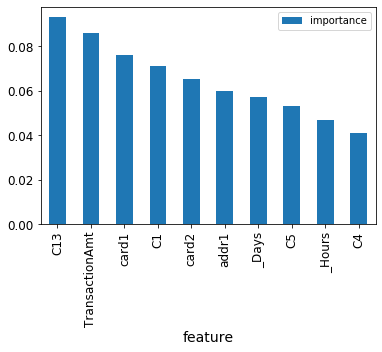

In [274]:
importance_m.plot.bar()

In [275]:
y_pred_train=m.predict(X_train)
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    427440
           1       1.00      1.00      1.00    427440

    accuracy                           1.00    854880
   macro avg       1.00      1.00      1.00    854880
weighted avg       1.00      1.00      1.00    854880



In [276]:
roc_auc_score(y_train, y_pred_train)

0.9999929814710837

### Adaboost with gridsearch

In [277]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
param_grid_ada={'n_estimators':range(10, 50, 10),
            'learning_rate':np.arange(0.1,1,0.1)}
ada_boost_grid=AdaBoostClassifier()
ada_grid=RandomizedSearchCV(ada_boost_grid,param_grid_ada,cv=5,scoring = 'roc_auc',refit = True, n_jobs=-1, verbose = 5)
ada_grid.fit(X_train,y_train)
ada_best=ada_grid.best_estimator_
y_pred_ada_grid=ada_best.predict(X_test)
y_pred_ada_prob_grid=ada_best.predict_proba(X_test)
class_report_ada_grid=classification_report(y_test,y_pred_ada_grid,labels=[0,1])
print(class_report_ada_grid)
y_scores_ada_grid = y_pred_ada_prob_grid[:,1]
roc_auc_score(y_test, y_scores_ada_grid)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   23.9s
[Parallel(n_jobs=-1)]: Done  46 out of  50 | elapsed:  4.3min remaining:   22.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  4.3min finished


              precision    recall  f1-score   support

           0       0.99      0.79      0.88    142437
           1       0.11      0.70      0.19      5198

    accuracy                           0.78    147635
   macro avg       0.55      0.74      0.53    147635
weighted avg       0.96      0.78      0.85    147635



0.8275160506958622

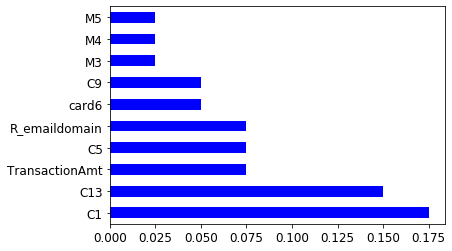

In [278]:
import matplotlib.pyplot as plt

importances_ada = pd.Series(ada_best.feature_importances_,
index = X_train.columns)
sorted_importances_ada = importances_ada.sort_values(ascending=False)[0:10]
sorted_importances_ada.plot(kind='barh', color='blue')
plt.show()

In [279]:
y_pred_ada=ada_best.predict(X_train)
print(classification_report(y_train,y_pred_ada))

              precision    recall  f1-score   support

           0       0.72      0.79      0.75    427440
           1       0.77      0.70      0.73    427440

    accuracy                           0.74    854880
   macro avg       0.74      0.74      0.74    854880
weighted avg       0.74      0.74      0.74    854880



In [280]:
roc_auc_score(y_train, y_pred_ada)

0.7423884053902302

### SVM- LinearSVM classifier


In [281]:
from sklearn.svm import LinearSVC

In [282]:
mod_lin_svc =LinearSVC()
mod_lin_svc.fit(X_train,y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [283]:
y_pred_lin_svc=mod_lin_svc.predict(X_test)
class_report_lin_svc=classification_report(y_test,y_pred_lin_svc)
print(class_report_lin_svc)

              precision    recall  f1-score   support

           0       0.97      0.98      0.98    142437
           1       0.22      0.14      0.18      5198

    accuracy                           0.95    147635
   macro avg       0.60      0.56      0.58    147635
weighted avg       0.94      0.95      0.95    147635



In [284]:
y_pred_lin_svc_trian=mod_lin_svc.predict(X_train)
print(classification_report(y_train,y_pred_lin_svc_trian))

              precision    recall  f1-score   support

           0       0.53      0.98      0.69    427440
           1       0.89      0.14      0.25    427440

    accuracy                           0.56    854880
   macro avg       0.71      0.56      0.47    854880
weighted avg       0.71      0.56      0.47    854880



### Gradient Boosting

In [285]:
from sklearn.ensemble import GradientBoostingClassifier
gra_boost=GradientBoostingClassifier()
gra_boost.fit(X_train,y_train)
y_pred_gra=gra_boost.predict(X_test)
y_pred_gra_prob=gra_boost.predict_proba(X_test)
class_report_gra=classification_report(y_test,y_pred_gra,labels=[0,1])
print(class_report_gra)

              precision    recall  f1-score   support

           0       0.99      0.85      0.91    142437
           1       0.15      0.73      0.25      5198

    accuracy                           0.85    147635
   macro avg       0.57      0.79      0.58    147635
weighted avg       0.96      0.85      0.89    147635



In [286]:
gra_boost_prob=gra_boost.predict_proba(X_test)
roc_auc_score(y_test,gra_boost_prob[:,1])

0.8705292172899196

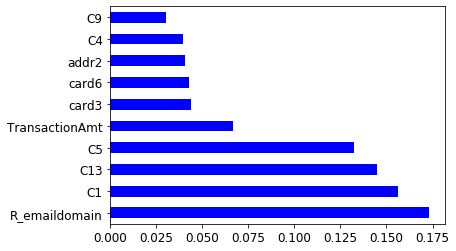

In [287]:
import matplotlib.pyplot as plt

importances_gra = pd.Series(gra_boost.feature_importances_,
index = X_train.columns)
sorted_importances_gra = importances_gra.sort_values(ascending=False)[0:10]
sorted_importances_gra.plot(kind='barh', color='blue')
plt.show()

In [288]:
y_pred_gra_boost_trian=gra_boost.predict(X_train)
print(classification_report(y_train,y_pred_gra_boost_trian))

              precision    recall  f1-score   support

           0       0.76      0.85      0.80    427440
           1       0.83      0.73      0.78    427440

    accuracy                           0.79    854880
   macro avg       0.80      0.79      0.79    854880
weighted avg       0.80      0.79      0.79    854880



In [289]:
gra_boost_prob_train=gra_boost.predict_proba(X_train)
roc_auc_score(y_train,gra_boost_prob_train[:,1])

0.8703776077037902

## Randomized Search on XGboost

In [72]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

#create a dictionary of parameters 
param_grid = {'n_estimators':list(range(100,1001,100)),
'learning_rate':list(np.arange(0.1, 0.51, 0.1)),
'max_depth':[1,2],
'gamma':list(np.arange(0, 5.1, 0.25))}

# create XGBoost model 
xgb_obj = XGBClassifier()

# Create gridsearch object with various combinations of parameters
xgb_Rand = RandomizedSearchCV(xgb_obj, param_grid, cv=4, scoring = 'recall',refit = True, n_jobs=-1, verbose = 5)

# fit gridsearch object to training data
xgb_Rand.fit(X_train, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  2.0min
/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  34 out of  40 | elapsed: 44.3min remaining:  7.8min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 49.2min finished


RandomizedSearchCV(cv=4, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                   param_distributions={'gamma': [0.0, 0.25, 0.5, 0.75, 1.0,
                                                  1.25, 1.5, 1.75, 2.0, 2.25,
                      

In [73]:
xgb_Rand.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=2.5,
              learning_rate=0.5, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=600, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [74]:
from xgboost import XGBClassifier

xgb_best = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.75,
              learning_rate=0.5, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=600, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
xgb_best.fit(X_train,y_train)
y_pred_proba_best_xgb = xgb_best.predict_proba(X_test)
y_pred_best_xgb = xgb_best.predict(X_test)

In [75]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print('Best XGBoost Model Confusion Matrix \n', confusion_matrix(y_test,y_pred_best_xgb))
print('\n Best XGBoost Model Classification Report \n',classification_report(y_test,y_pred_best_xgb))

Best XGBoost Model Confusion Matrix 
 [[124015  18422]
 [  1050   4148]]

 Best XGBoost Model Classification Report 
               precision    recall  f1-score   support

           0       0.99      0.87      0.93    142437
           1       0.18      0.80      0.30      5198

    accuracy                           0.87    147635
   macro avg       0.59      0.83      0.61    147635
weighted avg       0.96      0.87      0.91    147635



In [76]:
y_train_xgb = xgb_best.predict(X_train)


print('Best XGBoost Model Trainign Data Confusion Matrix \n', confusion_matrix(y_train, y_train_xgb))
print('\n Best XGBoost Model Classification Report \n',classification_report(y_train,y_train_xgb))

Best XGBoost Model Trainign Data Confusion Matrix 
 [[372716  54724]
 [ 79047 348393]]

 Best XGBoost Model Classification Report 
               precision    recall  f1-score   support

           0       0.83      0.87      0.85    427440
           1       0.86      0.82      0.84    427440

    accuracy                           0.84    854880
   macro avg       0.84      0.84      0.84    854880
weighted avg       0.84      0.84      0.84    854880

